In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/StudentsPerformance.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,raceEthnicity,parentalLevelOfEducation,lunch,testPreparationCourse,mathScore,readingScore,writingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print('math avg: ' + str(df.mathScore.mean()))
print('reading avg: ' + str(df.readingScore.mean()))
print('writing avg: ' + str(df.writingScore.mean()))

math avg: 66.089
reading avg: 69.169
writing avg: 68.054


In [ ]:
print('lowest reading score: ' + str(df.readingScore.min()))

lowest reading score: 17


In [ ]:
print('math variance: ' + str(round(df.mathScore.std(), 2)))
print('reading variance: ' + str(round(df.readingScore.std(), 2)))
print('writing variance: ' + str(round(df.writingScore.std(), 2)))

math variance: 15.16
reading variance: 14.6
writing variance: 15.2


In [ ]:
from scipy.stats import skew

print('math skew: ' + str(round(df.mathScore.skew(), 2)))
print('reading skew: ' + str(round(df.readingScore.skew(), 2)))
print('writing skew: ' + str(round(df.writingScore.skew(), 2)))

math skew: -0.28
reading skew: -0.26
writing skew: -0.29


Create a stacked plot (histogram with a boxplot) using the Seaborn package. Filter the original dataframe so you are only using data where the lunch is standard. Set the boxplot's y-axis as gender and the boxplot's x-axis as writing score. Divide the histogram by gender. Embed your name, the mean writing score for females, the mean writing score for males, the standard deviation writing score for males and the standard deviation writing score for females as text onto the image. Make sure the graph looks neat.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


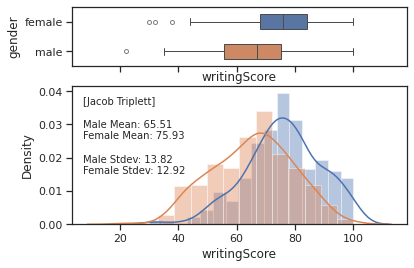

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

filtered_df = df[df.lunch == 'standard']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})

sns.set(style="ticks")

flierprops = dict(marker='o', markersize=4, markerfacecolor='none', linestyle='none', markeredgecolor='gray')
sns.boxplot(x=filtered_df.writingScore, y=filtered_df.gender, ax=ax_box, fliersize=4, width=0.50, linewidth=1, flierprops=flierprops)

sns.distplot(filtered_df[filtered_df['gender']=='female'].writingScore, ax=ax_hist)
sns.distplot(filtered_df[filtered_df['gender']=='male'].writingScore, ax=ax_hist)

text = '[Jacob Triplett]' + '\n\n'
text += 'Male Mean: ' + str(round(filtered_df[filtered_df['gender']=='male'].writingScore.mean(), 2)) + '\n'
text += 'Female Mean: ' + str(round(filtered_df[filtered_df['gender']=='female'].writingScore.mean(), 2)) + '\n\n'
text += 'Male Stdev: ' + str(round(filtered_df[filtered_df['gender']=='male'].writingScore.std(), 2)) + '\n'
text += 'Female Stdev: ' + str(round(filtered_df[filtered_df['gender']=='female'].writingScore.std(), 2))

plt.text(0.15, 0.3, text, fontsize=10, transform=plt.gcf().transFigure)

plt.show()

In [ ]:
filtered_df.readingScore.max()

100

In [ ]:
print(filtered_df[filtered_df['gender']=='female'].writingScore.max())
print(filtered_df[filtered_df['gender']=='male'].writingScore.max())

100
100


Generate the correlation coefficient and p-value for each possible numeric to numeric pair (math score - reading score, math score - writing score, reading score - writing score). Use the original data (don't filter based on lunch). Display the results (the format doesn't matter). 

In [ ]:
from scipy import stats

corr = stats.pearsonr(df.mathScore, df.readingScore)
print('math/reading ... r: ' + str(round(corr[0], 3)) + '\t p-value:' + str(round(corr[1], 4))) 
corr = stats.pearsonr(df.mathScore, df.writingScore)
print('math/writing ... r: ' + str(round(corr[0], 3)) + '\t p-value:' + str(round(corr[1], 4))) 
corr = stats.pearsonr(df.writingScore, df.readingScore)
print('writing/reading ... r: ' + str(round(corr[0], 3)) + '\t p-value:' + str(round(corr[1], 4))) 

math/reading ... r: 0.818	 p-value:0.0
math/writing ... r: 0.803	 p-value:0.0
writing/reading ... r: 0.955	 p-value:0.0


Filter the original dataframe to data where the test preparation couse is completed. Create a scatter plot with the writing score as the x-axis and the math score as the y-axis. Make the markers an 'x' and the marker color green. Generate the linear regression line, r2, r, and p-value and print them on the image.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


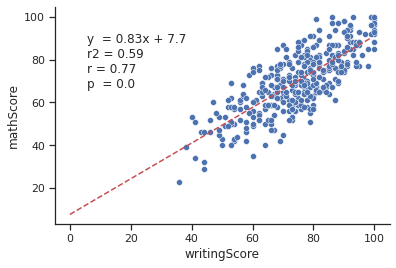

In [ ]:
filtered_df = df[df.testPreparationCourse == 'completed']

plt.figure(figsize=(6, 4))
sns.scatterplot(filtered_df['writingScore'], filtered_df['mathScore']);
sns.despine(top=True, right=True)
m, b, r, p, err = stats.linregress(filtered_df['writingScore'], filtered_df['mathScore'])
nums = range(filtered_df['writingScore'].max())
plt.plot(nums,m * nums + b,"r--")

textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
textstr += 'r = ' + str(round(r, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(.2, 0.6, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

Filter the original dataframe to data where the test preparation couse is 'none'. Create a scatter plot with the writing score as the x-axis and the math score as the y-axis. Make the markers an 'o' and the marker color blue. Generate the linear regression line, r2, r, and p-value and print them on the image. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


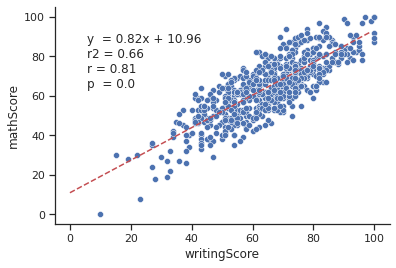

In [ ]:
filtered_df = df[df.testPreparationCourse == 'none']

plt.figure(figsize=(6, 4))
sns.scatterplot(filtered_df['writingScore'], filtered_df['mathScore']);
sns.despine(top=True, right=True)
m, b, r, p, err = stats.linregress(filtered_df['writingScore'], filtered_df['mathScore'])
nums = range(filtered_df['writingScore'].max())
plt.plot(nums,m * nums + b,"r--")

textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
textstr += 'r = ' + str(round(r, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(.2, 0.6, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

In [ ]:
df.head()

,gender,raceEthnicity,parentalLevelOfEducation,lunch,testPreparationCourse,mathScore,readingScore,writingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
import statistics as stat

F, p = stats.f_oneway(df.parentalLevelOfEducation=='associate\'s degree', 
                      df.parentalLevelOfEducation=='bachelor\'s degree', 
                      df.parentalLevelOfEducation=='master\'s degree', 
                      df.parentalLevelOfEducation=='some college', 
                      df.parentalLevelOfEducation=='some high school'
                      )

print(round(F, 3))
print(round(p, 4))

39.175
0.0


Create an image that includes a barplot and text showing an ANOVA analysis, Bonferroni corrections, the mean value for each bar/grouping and your name.

For the barplot, set the x axis to the parental level of education and the y axis as the math score.

For the barplot, ANOVA analysis and Bonferroni correction, the parental level of education is the feature and the math score is the label. Set the order of the bar plot as some high school, high school, some college, associate's degree, bachelor's degree, and master's degree. Generate and display the mean for each grouping (some high school, high school, etc.).



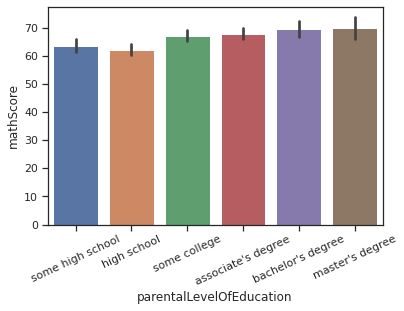

In [ ]:
viz = sns.barplot(x=df["parentalLevelOfEducation"], y=df["mathScore"],
                    order=['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

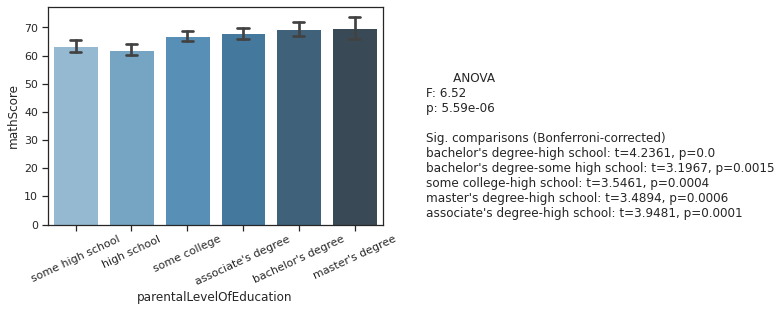

In [ ]:
groups = df['parentalLevelOfEducation'].unique()
df_grouped = df.groupby('parentalLevelOfEducation')
group_labels = []
for g in groups:
  g_list = df_grouped.get_group(g)
  group_labels.append(g_list['mathScore'])

oneway = stats.f_oneway(*group_labels)
unique_groups = df['parentalLevelOfEducation'].unique()
ttests = []

# Pay close attention to this code, this is how I'm including only the 
# significant t-test results without repeating tests already performed.
# You may find it useful to print out i, i2, group, group2 after each loop to understand how it works
for i, group in enumerate(unique_groups): # enumerate allows us to include an indexer i (0, 1, 2, 3, ..., n)
  for i2, group_2 in enumerate(unique_groups):
    if i2 > i: # Only calcuate the t-test if the inner loop index is greater than the outer loop index
      type_1 = df[df['parentalLevelOfEducation'] == group]
      type_2 = df[df['parentalLevelOfEducation'] == group_2]
      t, p = stats.ttest_ind(type_1['mathScore'], type_2['mathScore'])
      ttests.append([group, group_2, t.round(4), p.round(4)])

p_threshold = 0.05 / len(ttests) # Bonferroni-corrected p-value determined

# Add all descriptive statistics to the diagram
textstr  = '       ANOVA' + '\n'
textstr += 'F: ' + str(oneway[0].round(2)) + '\n'
textstr += 'p: ' + str(oneway[1].round(8)) + '\n\n'
textstr += 'Sig. comparisons (Bonferroni-corrected)' + '\n'

for ttest in ttests:
  if ttest[3] <= p_threshold:
    textstr += ttest[0] + '-' + ttest[1] + ": t=" + str(ttest[2]) + ", p=" + str(ttest[3]) + '\n'

plt.figure(figsize=(6, 4))
plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
viz = sns.barplot(x=df["parentalLevelOfEducation"], y=df["mathScore"], 
                  order=['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], 
                  capsize=.2, palette="Blues_d")
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);
plt.show()

In [ ]:
df[df.parentalLevelOfEducation=='some college'].mean()

mathScore       67.128319
readingScore    69.460177
writingScore    68.840708
dtype: float64